In [1]:
!pip install git+https://github.com/tensorflow/docs

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/tensorflow/docs to /tmp/pip-req-build-ibbnzheu
  Running command git clone --filter=blob:none --quiet https://github.com/tensorflow/docs /tmp/pip-req-build-ibbnzheu
  Resolved https://github.com/tensorflow/docs to commit f2427a69cf3b706192288403c09d19d2b3dfc231
  Preparing metadata (setup.py) ... done
  Created wheel for tensorflow-docs: filename=tensorflow_docs-0.0.0.dev0-py3-none-any.whl size=182612 sha256=2b28e794d71a0057bff69ef9a20d23d171efeb0c857d35b78a6d2426a8d16e0b
  Stored in directory: /tmp/pip-ephem-wheel-cache-j414z941/wheels/fc/f8/3b/5d21409a59cb1be9b1ade11f682039ced75b84de9dd6a0c8de
Successfully built tensorflow-docs


In [2]:
import tensorflow as tf
import numpy as np
import keras
from keras import regularizers
import tensorflow_docs as tfdocs
import tensorflow_docs.modeling
import tensorflow_docs.plots
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [3]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 2s 0us/step


In [4]:
X_train.shape

(60000, 28, 28)

In [5]:
np.max(X_train)

255

In [6]:
X_train = X_train.astype(np.float32)
X_test = X_test.astype(np.float32)

In [7]:
X_train /= 255.00
X_test /= 255.00
np.max(X_train)

1.0

In [8]:
def get_callbacks(name):
  return [
      keras.callbacks.EarlyStopping(monitor="val_loss", patience=200),
      keras.callbacks.TensorBoard(f"logs/{name}"),
  ]

In [9]:
optimizer = keras.optimizers.Adam(1e-3)
epochs = 30

def compile_and_fit(model, name, optimizer=optimizer, epochs=epochs):
  model.compile(optimizer=optimizer,
                loss=keras.losses.SparseCategoricalCrossentropy(),
                metrics=["accuracy"]
               )
  
  model.summary()

  history = model.fit(X_train, y_train, validation_data=(X_test, y_test), \
                      callbacks=get_callbacks(name), epochs=epochs)

  return history

In [10]:
small_model = keras.Sequential([
    keras.layers.Flatten(input_shape=X_train.shape[1:]),
    keras.layers.Dense(16, activation="relu"),
    keras.layers.Dense(16, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [11]:
model_history = {}

In [12]:
plotter = tfdocs.plots.HistoryPlotter(metric = 'loss', smoothing_std=10)

In [13]:
model_history["small"] = compile_and_fit(small_model, "small_model")

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 16)                12560     
                                                                 
 dense_1 (Dense)             (None, 16)                272       
                                                                 
 dense_2 (Dense)             (None, 10)                170       
                                                                 
Total params: 13,002
Trainable params: 13,002
Non-trainable params: 0
_________________________________________________________________
Epoch 1/30
1875/1875 [==============================] - 9s 3ms/step - loss: 0.4596 - accuracy: 0.8650 - val_loss: 0.2579 - val_accuracy: 0.9238
Epoch 2/30
1875/1875 [==================

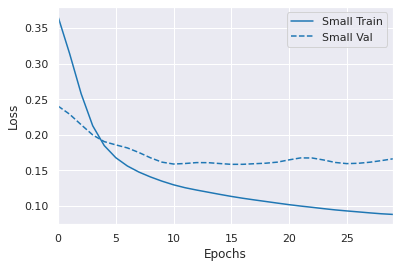

In [14]:
plotter.plot(model_history)

In [15]:
medium_model = keras.Sequential([
    keras.layers.Flatten(input_shape=X_train.shape[1:]),
    keras.layers.Dense(64, activation="relu"),
    keras.layers.Dense(64, activation="relu"),
    keras.layers.Dense(64, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [16]:
model_history["medium"] = compile_and_fit(medium_model, "medium_model")

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 64)                50240     
                                                                 
 dense_4 (Dense)             (None, 64)                4160      
                                                                 
 dense_5 (Dense)             (None, 64)                4160      
                                                                 
 dense_6 (Dense)             (None, 10)                650       
                                                                 
Total params: 59,210
Trainable params: 59,210
Non-trainable params: 0
_________________________________________________________________
Epoch 1/30
1875/1875 [============================

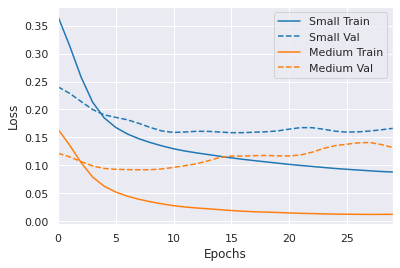

In [17]:
plotter.plot(model_history)

In [18]:
large_model = keras.Sequential([
  keras.layers.Flatten(input_shape=X_train.shape[1:]),
  keras.layers.Dense(512, activation="relu"),
  keras.layers.Dense(512, activation="relu"),
  keras.layers.Dense(512, activation="relu"),
  keras.layers.Dense(512, activation="relu"),
  keras.layers.Dense(10, activation="softmax")
])

In [19]:
model_history["large"] = compile_and_fit(large_model, "large_model")

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_7 (Dense)             (None, 512)               401920    
                                                                 
 dense_8 (Dense)             (None, 512)               262656    
                                                                 
 dense_9 (Dense)             (None, 512)               262656    
                                                                 
 dense_10 (Dense)            (None, 512)               262656    
                                                                 
 dense_11 (Dense)            (None, 10)                5130      
                                                                 
Total params: 1,195,018
Trainable params: 1,195,018
No

In [20]:
model_history

{'small': <keras.callbacks.History at 0x7fa1c63a96a0>,
 'medium': <keras.callbacks.History at 0x7fa1c5f4bdc0>,
 'large': <keras.callbacks.History at 0x7fa1c5cd9ac0>}

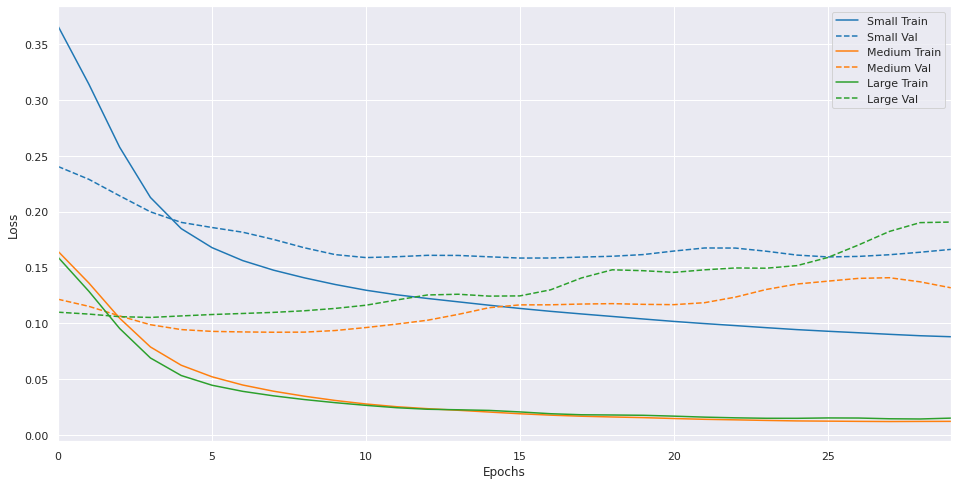

In [21]:
fig = plt.figure(figsize=(16,8))
plotter.plot(model_history)

In [22]:
%load_ext tensorboard

%tensorboard --logdir logs

<IPython.core.display.Javascript object>

In [23]:
# !tensorboard dev upload --logdir logs

In [24]:
regularizers_history = {}
regularizers_history["small"] = model_history["small"]

In [25]:
l2_model = keras.Sequential([
    keras.layers.Flatten(input_shape=X_train.shape[1:]),
    keras.layers.Dense(512, activation="relu", kernel_regularizer=regularizers.l2(1e-3)),
    keras.layers.Dense(512, activation="relu", kernel_regularizer=regularizers.l2(1e-3)),
    keras.layers.Dense(512, activation="relu", kernel_regularizer=regularizers.l2(1e-3)),
    keras.layers.Dense(512, activation="relu", kernel_regularizer=regularizers.l2(1e-3)),
    keras.layers.Dense(10, activation="softmax")
])

In [26]:
regularizers_history["l2"] = compile_and_fit(l2_model, "/regularizers/l2")

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_12 (Dense)            (None, 512)               401920    
                                                                 
 dense_13 (Dense)            (None, 512)               262656    
                                                                 
 dense_14 (Dense)            (None, 512)               262656    
                                                                 
 dense_15 (Dense)            (None, 512)               262656    
                                                                 
 dense_16 (Dense)            (None, 10)                5130      
                                                                 
Total params: 1,195,018
Trainable params: 1,195,018
No

In [27]:
regularizers_history

{'small': <keras.callbacks.History at 0x7fa1c63a96a0>,
 'l2': <keras.callbacks.History at 0x7fa19c0741c0>}

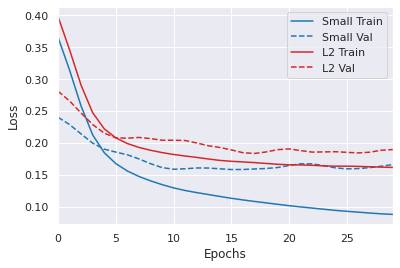

In [28]:
plotter.plot(regularizers_history)

In [29]:
dropout_model = keras.Sequential([
    keras.layers.Flatten(input_shape=X_train.shape[1:]),
    keras.layers.Dense(512, activation="relu"),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(512, activation="relu"),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(512, activation="relu"),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(512, activation="relu"),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10, activation="softmax")
])

In [30]:
regularizers_history["dropout"] = compile_and_fit(dropout_model, "/regularizers/dropout")

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 dense_17 (Dense)            (None, 512)               401920    
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_18 (Dense)            (None, 512)               262656    
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dense_19 (Dense)            (None, 512)               262656    
                                                                 
 dropout_2 (Dropout)         (None, 512)              

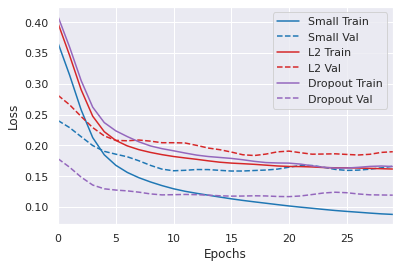

In [31]:
plotter.plot(regularizers_history)

In [32]:
combined_model = keras.Sequential([
    keras.layers.Flatten(input_shape=X_train.shape[1:]),
    keras.layers.Dense(512, activation="relu", kernel_regularizer=regularizers.l2(1e-3)),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(512, activation="relu", kernel_regularizer=regularizers.l2(1e-3)),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(512, activation="relu", kernel_regularizer=regularizers.l2(1e-3)),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(512, activation="relu", kernel_regularizer=regularizers.l2(1e-3)),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10, activation="softmax")
])

In [33]:
regularizers_history["combined"] = compile_and_fit(combined_model, "/regularizers/combined")

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_5 (Flatten)         (None, 784)               0         
                                                                 
 dense_22 (Dense)            (None, 512)               401920    
                                                                 
 dropout_4 (Dropout)         (None, 512)               0         
                                                                 
 dense_23 (Dense)            (None, 512)               262656    
                                                                 
 dropout_5 (Dropout)         (None, 512)               0         
                                                                 
 dense_24 (Dense)            (None, 512)               262656    
                                                                 
 dropout_6 (Dropout)         (None, 512)              

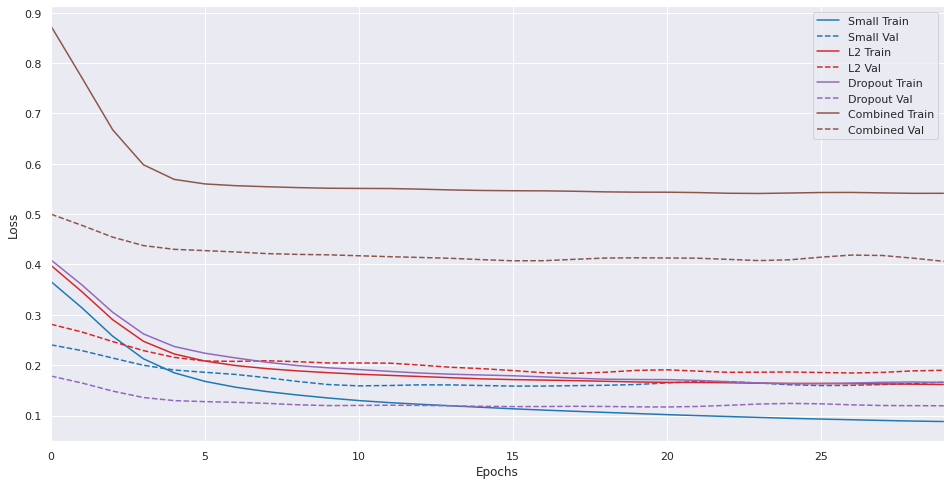

In [34]:
fig = plt.figure(figsize=(16,8))
plotter.plot(regularizers_history)

In [35]:
# !tensorboard dev upload --logdir logs/regularizers

2023-03-29 07:02:31.423022: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/lib64-nvidia
2023-03-29 07:02:31.423118: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/lib64-nvidia
2023-03-29 07:02:31.423139: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Cannot dlopen some TensorRT libraries. If you would like to use Nvidia GPU with TensorRT, please make sure the missing libraries mentioned above are installed properly.

***** TensorBoard Uploader *****

This will upload your TensorBoard logs to https://tensorboard.dev/ from
the following directory:

logs/regularizers

This TensorBoar

In [36]:
dropout_model_02 = keras.Sequential([
    keras.layers.Flatten(input_shape=X_train.shape[1:]),
    keras.layers.Dense(512, activation="relu"),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(512, activation="relu"),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(512, activation="relu"),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(512, activation="relu"),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(10, activation="softmax")
])

regularizers_history["dropout_02"] = compile_and_fit(dropout_model_02, "/regularizers/dropout_02")

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_6 (Flatten)         (None, 784)               0         
                                                                 
 dense_27 (Dense)            (None, 512)               401920    
                                                                 
 dropout_8 (Dropout)         (None, 512)               0         
                                                                 
 dense_28 (Dense)            (None, 512)               262656    
                                                                 
 dropout_9 (Dropout)         (None, 512)               0         
                                                                 
 dense_29 (Dense)            (None, 512)               262656    
                                                                 
 dropout_10 (Dropout)        (None, 512)              

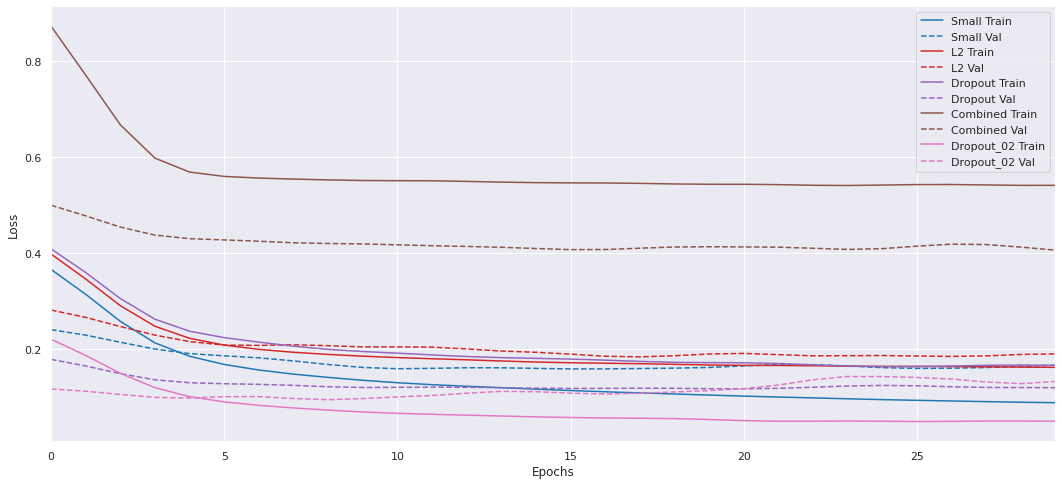

In [40]:
fig = plt.figure(figsize=(18, 8))
plotter.plot(regularizers_history)

In [38]:
regularizers_history

{'small': <keras.callbacks.History at 0x7fa1c63a96a0>,
 'l2': <keras.callbacks.History at 0x7fa19c0741c0>,
 'dropout': <keras.callbacks.History at 0x7fa132d14880>,
 'combined': <keras.callbacks.History at 0x7fa1300ef7c0>,
 'dropout_02': <keras.callbacks.History at 0x7fa1c5cd78b0>}